# **Pertemuan 3 - Probabilistic Model and Axioms**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

**Outline**

1. Review
2. Case 1 - Simulasi Lempar Dadu
3. Case 2 - Keuntungan Perusahaan
4. Case 3 - Popularitas Menu Makanan

## **Review**
---

- **Probabilistic Model:** Model yang menjelaskan kondisi **uncertain** dengan **lebih sistematis**
- **Random Experiment:** Proses melakukan observasi ke sesuatu yang masih **uncertain**

    Contoh:
    - Observasi pelemparan dadu 6 sisi 
    - Observasi terjadinya gol di pertandingan Sepak Bola
    - Observasi banyaknya email masuk dalam sehari
    - dll
- **Sample Space:** Kumpulan possible outcomes yang mungkin bisa terjadi dalam suatu experiment. Umumnya di notasikan dalam bentuk $\Omega$ (Omega)

    Contoh:
    - Kemungkinan gol yang bisa terjadi dalam satu pertandingan Sepak Bola
    - Waktu menunggu kedatangan Bus di Halte
    - dll
- **Event:** Kejadian yang terjadi di dalam Sample Space

    Contoh:
    - Event terjadinya Gol yang dicetak oleh Striker
    - Event terjadinya Gol yang dicetak oleh Midfielder
    - dll
    
- Setelah memiliki **Sample Space** dan **Event**, maka selanjutntya adalah membuat Probability Model
- Pendekatan Probability Model yang paling sederhana adalah dengan menghitung proporsi frekuensi kejadian Event di dalam Sample Space

##### Probability Formula

$$P(E)=\frac{n(E)}{n(\Omega)}$$

## **Study Case #1: Pelemparan Dadu**
---


<img src="https://cdn-icons-png.flaticon.com/512/7101/7101743.png" alt="drawing" width="200"/>

Kita melakukan pelemparan **satu** dadu 6 sisi, ditanya:
- Berapa peluang munculnya angka $6$ saat melempar dadu?  

Untuk menjawab pertanyaan tersebut, kita bisa menjawab dengan dua pendekatan, yaitu:
- Melakukan **simulasi** melemparkan dadu secara berkali - kali
- Menggunakan rumus Probability untuk mencari nilainya

---

### **Pendekatan 1: Simulasi**

- Lalu, berapakah nilai peluang munculnya angka $6$ jika melakukan pelemparan sebanyak 5x?

- Dengan bantuan Python, kita bisa melakukan simulasi pelemparan tersebut

In [2]:
# IMPORT LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sekarang kita coba lakukan simulasi pelemparan sebanyak 5x

In [3]:
hasil_lempar = np.random.randint(1, 7, 5)

print(hasil_lempar)

[1 1 4 2 6]


Untuk menghitung berapa kali kemunculan mata dadu dalam 5x pelemparan, kita bisa menggunakan `np.unique()`

In [4]:
event_yang_muncul, frekuensi_muncul = np.unique(hasil_lempar, return_counts=True) 
# parameter return_counts berguna untuk menghitung berapa banyak unique value yang muncul

In [5]:
event_yang_muncul, frekuensi_muncul

(array([1, 2, 4, 6], dtype=int32), array([2, 1, 1, 1]))

Sekarang, kita coba menghitung nilai Probability dari pelemparan dadu 5x

In [6]:
proba_event = frekuensi_muncul / 5

proba_event

array([0.4, 0.2, 0.2, 0.2])

Agar lebih mudah untuk melakukan interpretasi, kita gunakan visualisasi

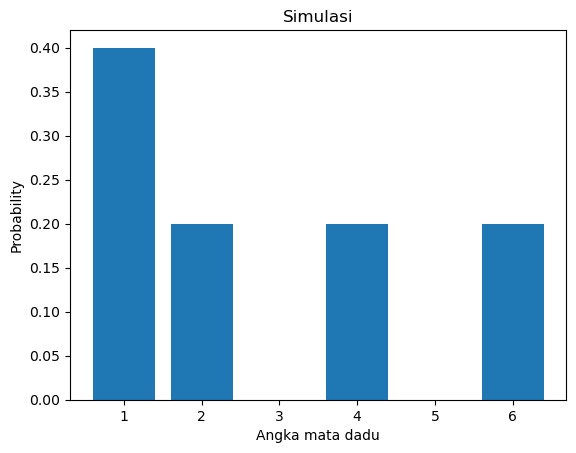

In [7]:
plt.bar(event_yang_muncul, proba_event)
plt.title("Simulasi")
plt.xticks(np.arange(1,7))
plt.xlabel("Angka mata dadu")
plt.ylabel("Probability")
plt.show()

- Nah, kalau kita lihat nilai probability dari masing - masing mata dadu ada yang belum memiliki nilai peluang
- Maka, kita coba lakukan pelemparan lebih banyak lagi (100x, 1.000x, 10.000x, ...)

Agar code nya terlihat lebih rapi dan mudah dipanggil, maka akan "dibungkus" dengan `function`

In [8]:
def probability_model_dadu(jumlah_pelemparan):
    """
    Simulasi pelemparan dadu 6 sisi sebanyak n kali

    Parameters
    ----------
        jumlah_pelemparan   : int 
                              jumlah pelemparan yang dilakukan
    """
    
    # melakukan pelemparan dadu sebanyak jumlah_pelemparan 
    hasil_pelemparan = np.random.randint(1, 7, jumlah_pelemparan)

    # untuk mengetahui berapa kali kemunculan mata dadu dalam jumlah_pelemparan
    event_yang_muncul, frekuensi_muncul = np.unique(hasil_pelemparan, return_counts=True)
    
    # menghitung probability
    proba_event = frekuensi_muncul / jumlah_pelemparan

    # melakukan visualisasi
    plt.bar(event_yang_muncul, proba_event)
    plt.title(f"Simulasi Pelemparan Dadu sebanyak {jumlah_pelemparan} kali")
    plt.xticks(np.arange(1, 7))
    plt.xlabel("Angka Mata Dadu")
    plt.ylabel("Probability")
    plt.show()

Sekarang kita coba lakukan eksperimen pelemparan dadu sebanyak 1000x dengan menggunakan function `probability_model_dadu`

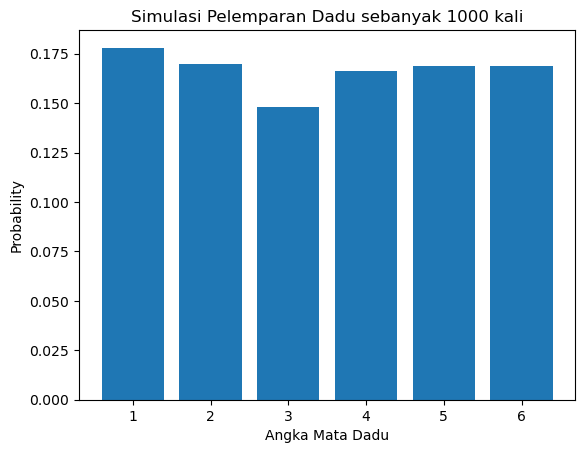

In [9]:
probability_model_dadu(jumlah_pelemparan=1000)

- Kalau kita lihat, sekarang masing - masing mata dadu memiliki nilai Probability
- Jika kita bandingkan dengan pelemparan sebanyak `5x`, nilai Probability dari masing - masing mata dadu juga ikut berubah

- Sekarang kita coba lakukan simulasi pelemparan dengan jumlah yang besar. Seperti melemparkan sebanyak `100.000` dan `1.000.000` kali

#### Pelemparan 100.000x

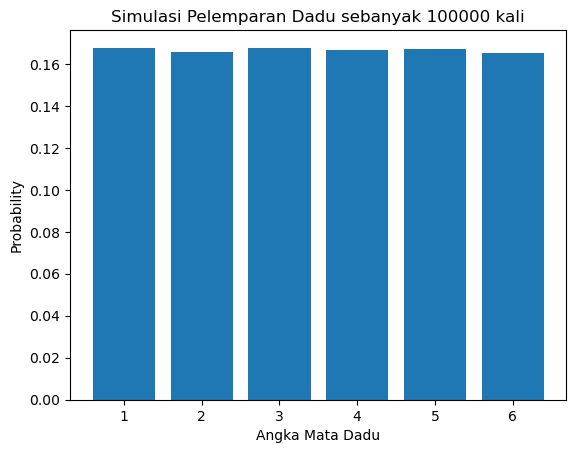

In [10]:
probability_model_dadu(jumlah_pelemparan=100000)

#### Pelemparan 1.000.000x

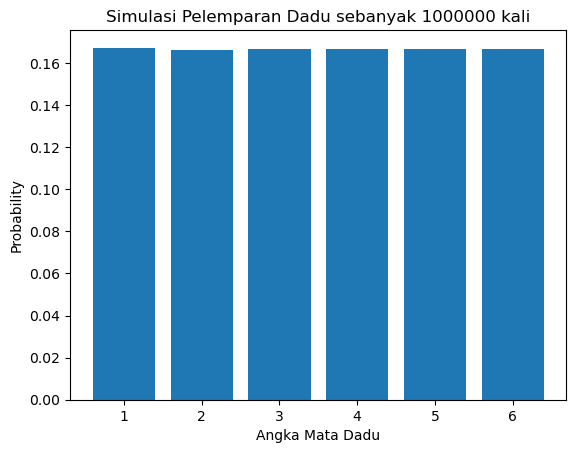

In [11]:
probability_model_dadu(jumlah_pelemparan=1000000)

- Dapat dilihat bahwa setelah melakukan simulasi pelemparan sebanyak `100.000` dan `1.000.000` nilai Probability nya mulai sama dan cenderung stabil
- Nilai Probability dari masing - masing mata dadu juga memiliki nilai yang relatif sama, yaitu $0.16666666666666666$ 
- Dapat disimpulkan, semakin banyak jumlah simulasi atau eksperimen yang dilakukan maka nilai Probability nya akan mulai stabil

---

### **Pendekatan 2: Probability Formula**
---

- Selain menggunakan pendekeatan Simulasi, kita juga bisa langsung mencari nilai Probability nya menggunakan Probability Formula
- Jika teman - teman lupa, langkah pertama kita harus menentukan Sample Space nya terlebih dahulu

- Karena disini kita melakukan eksperimen pelemparan **satu** dadu 6 sisi, maka Sample Space nya sebagai berikut

$$\Omega=\{1,2,3,4,5,6\} \\
n(\Omega)=6
$$




- Lalu langkah selanjutnya untuk mencari nilai Probability kita membutuhkan **Event**
- Karena yang diminta adalah mencari nilai Probability Angka 6 saat melempar dadu, maka Event nya sebagai berikut
$$E=\{6\} \\ 
n(E)=1
$$

- Setelah mendapatkan Sample Space dan Event, maka langkah selanjutnya adalah memasukkannya ke Probability Formula
$$
P(E)=\frac{n(E)}{n(\Omega)} \\ 
P(6)=\frac{1}{6}= 0.16666666666666666
$$

In [15]:
1/6

0.16666666666666666

---
#### Kesimpulan
- Untuk mencari nilai Probability dari pelemparan dadu, kita bisa menggunakan dua pendekatan yaitu dengan pendekatan Simulasi dan pendekatan menggunakan Formula
- Dari kedua pendekatan tersebut didapatkan hasil yang sama yaitu sekitar $P(6)=0.16666666666666666$
---

## **Study Case #2: Keuntungan Perusahaan**

---

- Dibawah ini adalah data mengenai keuntungan dari banyak perusahaan
- Dimana, dari jumlah keuntungan yang didapatkan per tahun akan dikategorikan seperti tabel dibawah ini

| **Kategori** | **Keuntungan per Tahun** | **Jumlah Perusahaan** |
|--------------|--------------------------|-----------------------|
|       A      | < 10 Juta                |                    60 |
|       B      | 10 Juta s.d 19 Juta      |                   100 |
|       C      | 20 Juta s.d 29 Juta      |                   160 |
|       D      | 30 Juta s.d 39 Juta      |                   140 |
|       E      | > 40 Juta                |                    40 |
| Total        |                          |                   500 |

---

#### **Pertanyaan 1:** Berapakah nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta?

##### Jawaban

- Dapat dilihat bahwa Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah `Kategori A`
- Jika kita menjawab dengan Probability Formula, maka akan seperti berikut
$$P(A)=\frac{n(A)}{n(\Omega)}$$

- Sekarang, kita coba jawab dengan bantuan Python!

In [16]:
# Data dari tabel
n_A = 60
n_sample_space = 500

- Setelah menentukan Sample Space dan Event, kita masukkan ke Probability Formula

In [17]:
p_A = n_A / n_sample_space

print(f"Nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah {p_A}")

Nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah 0.12


---
#### **Pertanyaan 2:** Berapakah nilai Probability dari Perusahaan yang memiliki keuntungan 10 Juta s.d 19 Juta **atau** diatas 40 Juta?

- Karena yang diminta adalah Perusahaan yang memiliki keuntungan 10 Juta s.d 19 Juta maka termasuk `Kategori B`
- Perusahaan yang memiliki keuntungan diatas 40 Juta termasuk `Kategori E`
- `Atau` biasanya dinotasikan sebagai $\cup$, sehingga kita akan mencari $P(B \cup E)$

> ***Hint:*** Untuk menjawab pertanyaan ini, teman - teman coba recall kembali mengenai **Axioms of Probability**